X_train shape: 16
y_train shape: 16
X_test shape: 4
y_test shape: 4


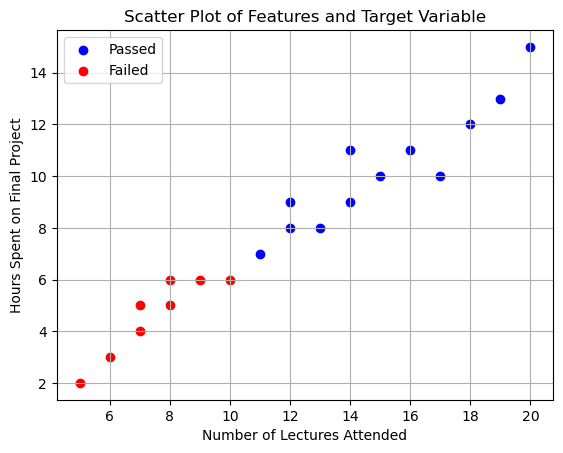

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.set_printoptions(suppress = True,
   formatter = {'float_kind':'{:f}'.format})

# Dataset
# Features (Number of lectures attended and Hours spent on the final project)
X = [
    [15, 10],
    [12, 8],
    [10, 6],
    [18, 12],
    [5, 2],
    [20, 15],
    [8, 5],
    [16, 11],
    [14, 9],
    [7, 4],
    [9, 6],
    [11, 7],
    [17, 10],
    [6, 3],
    [13, 8],
    [19, 13],
    [12, 9],
    [8, 6],
    [14, 11],
    [7, 5]
]

# Target variable (Result: 1 for pass, 0 for fail)
y = [1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
     0, 1, 1, 0, 1, 1, 1, 0, 1, 0]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
# Adding an extra dimension for single output
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) 
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Displaying the shapes of the training and testing sets
print("X_train shape:", len(X_train))
print("y_train shape:", len(y_train))
print("X_test shape:", len(X_test))
print("y_test shape:", len(y_test))

# Separate passed and failed examples
passed = [X[i] for i in range(len(X)) if y[i] == 1]
failed = [X[i] for i in range(len(X)) if y[i] == 0]

# Convert to numpy arrays for plotting
passed = plt.scatter([x[0] for x in passed], [x[1] for x in passed], color='blue', label='Passed')
failed = plt.scatter([x[0] for x in failed], [x[1] for x in failed], color='red', label='Failed')

# Plotting
plt.xlabel('Number of Lectures Attended')
plt.ylabel('Hours Spent on Final Project')
plt.title('Scatter Plot of Features and Target Variable')
plt.legend(handles=[passed, failed])
plt.grid(True)
plt.show()

In [2]:
# Define logistic regression model
class LogisticRegressionNN(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionNN, self).__init__()
        self.linear1 = nn.Linear(input_size, 1)
        #self.linear2 = nn.Linear(3, 1)
        #self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        #out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear1(x))
        #out = self.sigmoid(out)
        return out

# Instantiate the model
input_size = X_train.shape[1]
model = LogisticRegressionNN(input_size)

print("initial random w :", model.linear1.weight)
print("initial random b :", model.linear1.bias)

# Try to use the model before training
sample_X = torch.tensor([5, 5]).type(torch.FloatTensor)
y_pred = model(sample_X)
#print('y_pred before training:', y_pred)
print(f'y_pred before training: {y_pred.item():.4f}')

initial random w : Parameter containing:
tensor([[0.2126, 0.0716]], requires_grad=True)
initial random b : Parameter containing:
tensor([-0.6848], requires_grad=True)
y_pred before training: 0.6762


In [3]:
# Define loss function and optimizer
lossfun = nn.BCELoss()
# Gredient Descent
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = lossfun(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/2000], Loss: 0.4148
Epoch [200/2000], Loss: 0.3357
Epoch [300/2000], Loss: 0.2835
Epoch [400/2000], Loss: 0.2471
Epoch [500/2000], Loss: 0.2201
Epoch [600/2000], Loss: 0.1991
Epoch [700/2000], Loss: 0.1821
Epoch [800/2000], Loss: 0.1680
Epoch [900/2000], Loss: 0.1561
Epoch [1000/2000], Loss: 0.1459
Epoch [1100/2000], Loss: 0.1370
Epoch [1200/2000], Loss: 0.1292
Epoch [1300/2000], Loss: 0.1223
Epoch [1400/2000], Loss: 0.1162
Epoch [1500/2000], Loss: 0.1106
Epoch [1600/2000], Loss: 0.1056
Epoch [1700/2000], Loss: 0.1010
Epoch [1800/2000], Loss: 0.0968
Epoch [1900/2000], Loss: 0.0929
Epoch [2000/2000], Loss: 0.0893


In [4]:
# Test the model
with torch.no_grad():
    sample_X = torch.tensor([5, 5]).type(torch.FloatTensor)
    # Use the model to predict after training
    print("w after training:", model.linear1.weight)
    print("b after training:", model.linear1.bias)
    y_pred = model(sample_X)
    print(f'y_pred after training: {y_pred.item():.4f}')

    y_pred = model(X_test)
    y_class = y_pred.round()  # Convert probabilities to binary predictions
    accuracy = y_class.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy on test set: {accuracy.item()*100:.2f}%')

w after training: Parameter containing:
tensor([[0.0337, 1.4953]], requires_grad=True)
b after training: Parameter containing:
tensor([-10.3002], requires_grad=True)
y_pred after training: 0.0657
Accuracy on test set: 100.00%
